In [1]:
import numpy
from numpy import sqrt, pi, exp, linspace, loadtxt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

bv: [  6.71162230e+00   5.36818285e+00   1.19147493e-02   1.14610448e-09]
cov: [[  2.96995184e-02  -1.79558039e+00  -1.14819177e-02   3.49221168e-09]
 [ -1.79558039e+00   1.53985839e+02   1.02928817e+00  -3.31023117e-07]
 [ -1.14819177e-02   1.02928817e+00   6.92217441e-03  -2.24482323e-09]
 [  3.49221168e-09  -3.31023117e-07  -2.24482323e-09   7.36992034e-16]]
D1/D2 = 1.25025963122
D_obs: [ 5.8665   5.904    5.959    6.0405   6.1495   6.11625  6.1195   6.22625
  6.2075   6.33325  6.3885   6.5015   6.54175  6.691  ]
D_calc: [ 5.75425548  5.86196254  5.95886009  6.06048999  6.12071503  6.18248889
  6.24576571  6.31045789  6.37641879  6.44341783  6.51110408  6.56201237
  6.61270572  6.66276474]


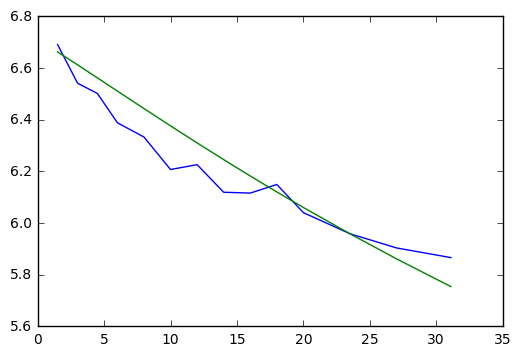

In [4]:
data = loadtxt('data_files\\caf.dat')
x0 = data[:,0]
D_obs = data[:,1]*1e10

def spherical(x0, D1, D2, K, d):
    k = 1.38e-23
    T = 298
    eta = 0.00125
    x1 = (1+2*K*x0-(1+4*K*x0)**.5)/(2*(K**2)*x0)
    
    M = numpy.zeros(len(x1))
    for i in range(3, 101):
        M += i**(2/3)*(K*x1)**(i-1)
    
    D = (x1/x0)*(D1+2*K*x1*D2+((k*T*1e10)/(3*pi*eta*d))*M)
    return D

bv, cov = curve_fit(
        spherical, x0, D_obs,
        p0=[7, 5.5, 1.15e-2,8e-10],
        method='trf',
#         max_nfev=100*len(x0),
        loss='soft_l1',
        bounds=([6,5,1e-2,3e-10], [8, 6, 1.3e-2, 3e-9]))

print('bv:', bv)
print('cov:', cov)
print('D1/D2 =', bv[0]/bv[1])
print('D_obs:', D_obs)
print('D_calc:', spherical(x0, bv[0], bv[1], bv[2], bv[3]))

plt.plot(x0, D_obs)
plt.plot(x0, spherical(x0, bv[0], bv[1], bv[2], bv[3]))